Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "anonym, anonym, anonym"
STUDENTID = "anonym, anonym, anonym"
GROUPID = "3"

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the supplemental read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* The visualisation should fit the chosen tasks on the data sets.
* You should employ at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to select a different visualisation for each. 
* As opposed to Assignment 2, you are expected to use pandas to represent and to prepare the data sets for visualisation.
* As for the Assignment 2 data sets, to avoid confusions:
 * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
 * If you worked with excerpts (samples) from the original and genuine datasets, you may continue using these. You are also free to use the complete datasets, but this is not expected
 * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

In [1]:

### 1st DATASET (CSV) - Weekly mortality rate in Austria ###
import csv
import json
import requests 
source1 = "https://www.wien.gv.at/gogv/l9ogdmortalitaetmonatlich"
resp1 = requests.get(source1)
headers1 = dict(resp1.headers) # with this method, headers are returned as CaseInsensitiveDictionary object and therefore can be translated to dict type.
data1 = resp1.content.decode('utf-8')

print('1st - CSV Dataset Header:')
print('\t|')
for key, value in headers1.items(): # reading our header (dictionary)
    print('\t|___', key, ':', value)

if 'Content-Length' in headers1.keys(): # content/file size check
    print("\n\t\t Content-Length in KB :", round((int(headers1['Content-Length'])/1024), 2), 'KB')
else:
    print("Content size can't be read from header.")
    
# saving data in a file for later use
file_path = 'data/data_notebook-1_weekly-mortality.csv'
with open(file_path, 'w', encoding='utf-8') as of:
    of.write(data1)

print('\nDataset saved in', file_path)
### 2nd DATASET (JSON) - Covid statistics Worldwide ###

source2 = "https://opendata.ecdc.europa.eu/covid19/casedistribution/json"

print('\n-------------------------------------------------------------------------------\n')
print('\nThis might take a while, please wait...')
resp2 = requests.get(source2)
headers2 = dict(resp2.headers)
data2 = resp2.json() # since I know that content is a json object (from url) I can take it with this method

print('\n2nd - JSON Dataset Header:')
print('\t|')
for key, value in headers2.items():
    print('\t|___', key, ':', value)

if 'Content-Length' in headers2.keys():
    print("\n\t\t Content-Length in KB :", round((int(headers2['Content-Length'])/1024), 2), 'KB')
else:
    print("\n\t\t Content size can't be read from header.")
          
# saving data in JSON file format for later use

file_path2 = 'data/data_notebook-1_covid-2020.json'
with open(file_path2, 'w') as of:
    json.dump(data2, of)
print('\nDataset saved in', file_path2)

1st - CSV Dataset Header:
	|
	|___ Date : Fri, 04 Dec 2020 18:00:08 GMT
	|___ Server : Magistrat der Stadt Wien - Web Gateway
	|___ Last-Modified : Thu, 03 Dec 2020 11:28:57 GMT
	|___ ETag : "5d1de-5b58daa603040"
	|___ Accept-Ranges : bytes
	|___ Content-Length : 381406
	|___ Content-Type : text/csv
	|___ Keep-Alive : timeout=15, max=225
	|___ Connection : Keep-Alive

		 Content-Length in KB : 372.47 KB

Dataset saved in data/data_notebook-1_weekly-mortality.csv

-------------------------------------------------------------------------------


This might take a while, please wait...

2nd - JSON Dataset Header:
	|
	|___ Content-Type : application/json
	|___ Last-Modified : Fri, 04 Dec 2020 10:01:20 GMT
	|___ Accept-Ranges : bytes
	|___ ETag : "8c714e6a24cad61:0"
	|___ Date : Fri, 04 Dec 2020 18:00:09 GMT
	|___ Strict-Transport-Security : max-age=16070400; includeSubDomains
	|___ Vary : Accept-Encoding
	|___ Content-Encoding : gzip
	|___ Transfer-Encoding : chunked

		 Content size can't

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

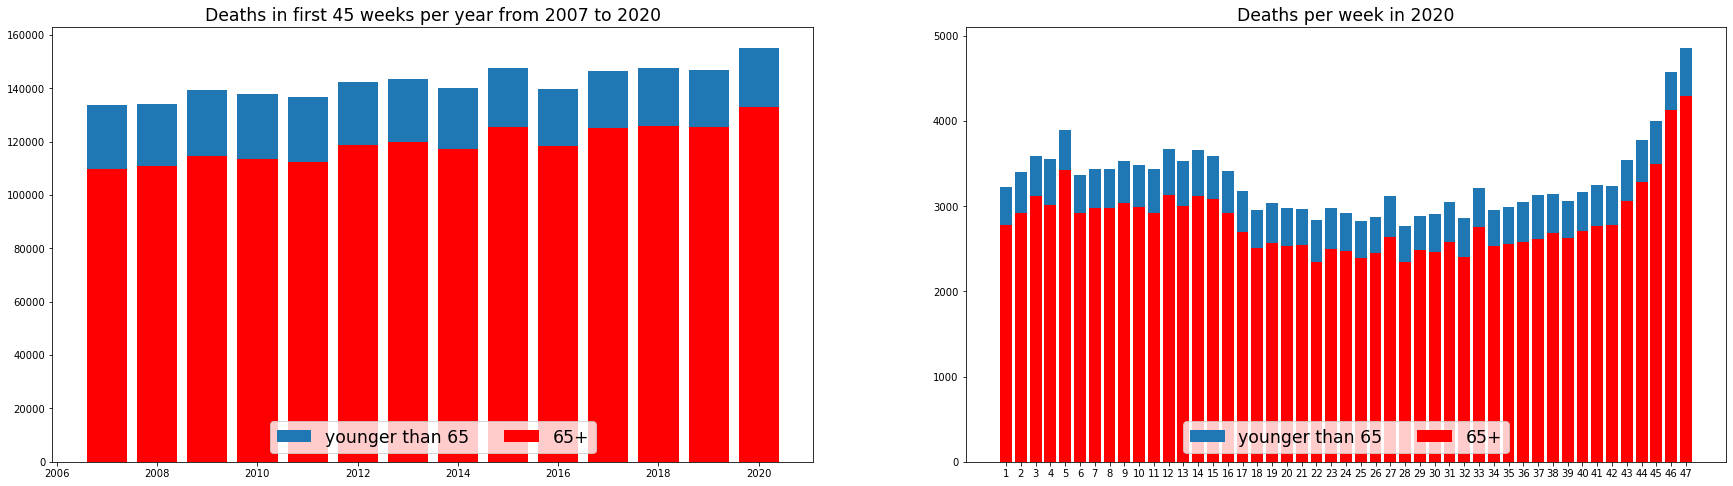

In [5]:
# ALL DEPENDECIES
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

file = os.path.join('data', 'data_notebook-1_weekly-mortality.csv')

df = pd.read_csv(file, sep=';')
first_45 = df.loc[df['WEEK_NO'] <= 47].copy() # we only care for first 45 weeks because there is no data in this dataset for weeks above 45th week in 2020
first_45['ALL_DEATHS'] = first_45['DEATHS_65PLUS'] + first_45['DEATHS_0_64'] # combining two columns to get sum of young and eldery deaths

grouped = first_45.groupby('REF_YEAR')['ALL_DEATHS'].sum() # grouping all deaths by year
grouped_65 = first_45.groupby('REF_YEAR')['DEATHS_65PLUS'].sum() # grouping only eldery deaths per year

plt.rcParams.update({'font.size': 10}) # setting default font
fig, plot = plt.subplots(1,2, figsize=(30,8)) # displaying both plots on one figure

plot[0].set_title('Deaths in first 45 weeks per year from 2007 to 2020', fontsize='xx-large') # setting title
plot[0].bar(grouped.index, grouped, label='younger than 65') # adding all deaths to the plot
plot[0].bar(grouped.index, grouped_65, color='r', label='65+') # adding deaths of 65+
plot[0].legend(ncol=2, loc='lower center', fontsize='xx-large') # adding legend

# 2020 Data - process is the same as for the "Austria Only Data"
only_2020 = df.loc[(df['REF_YEAR'] == 2020) & (df['WEEK_NO'] <= 47)].copy() # again only first 45 weeks
only_2020['ALL_DEATHS'] = only_2020['DEATHS_0_64'] + only_2020['DEATHS_65PLUS']
grouped_2020 = only_2020.groupby('WEEK_NO')['ALL_DEATHS'].sum()
grouped_2020_65 = only_2020.groupby('WEEK_NO')['DEATHS_65PLUS'].sum()

plot[1].set_title('Deaths per week in 2020', fontsize='xx-large')
plot[1].bar(grouped_2020.index, grouped_2020, label='younger than 65')
plot[1].bar(grouped_2020.index, grouped_2020_65, color='r', label='65+')
plot[1].xaxis.set_major_locator(mticker.FixedLocator(grouped_2020.index)) # adding each week number to X axis so its easier to read
plot[1].set_xticklabels(grouped_2020.index)
plot[1].legend(ncol=2, loc='lower center', fontsize='xx-large')

plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects:

* What is the task on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

Our first dataset "weekly-mortality" contains the numbers of deaths per week in Austria divided in the deaths from people above and under 65. The dataset contains data from 2007 to 2020. We used the most up-to-date data we could download and to make the other years comparable to 2020, we chose to only visualize the 45 weeks of every year as we have sofar only 45 weeks for the year 2020.

We created the first bar plot to see if the absolut deaths in 2020 are higher than in the other years, as a lot of people probably would expect.
In the plot we can see that 2020 (the first 45 weeks) had the absolut highest number of deaths since 2007 but it is only slightly higher.

On the other hand we thought it would be interesting to see how the weekly mortality increased since COVID19 became an important issue. Therefore, we compared the weekly deaths in the year 2020.

Both plots help us to have a better understanding about the accurent mortality rates in Austria and to realise that there is a pretty visible peak at the beginning of this year as well as after week 43, which can be connected to cold weather (people are more likely to die during the winter than summer, show the researches we found online) or the COVID19 itself. But we can see that sofar 2020 has the most deaths since 2007.

We chose barplots to highlight the exact differences per week and to make it possible to split the seperat bars even further into deaths from people under 65 and deaths from people over 65. As expected most of the deaths (around 80-85%) occure from people being over 65.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

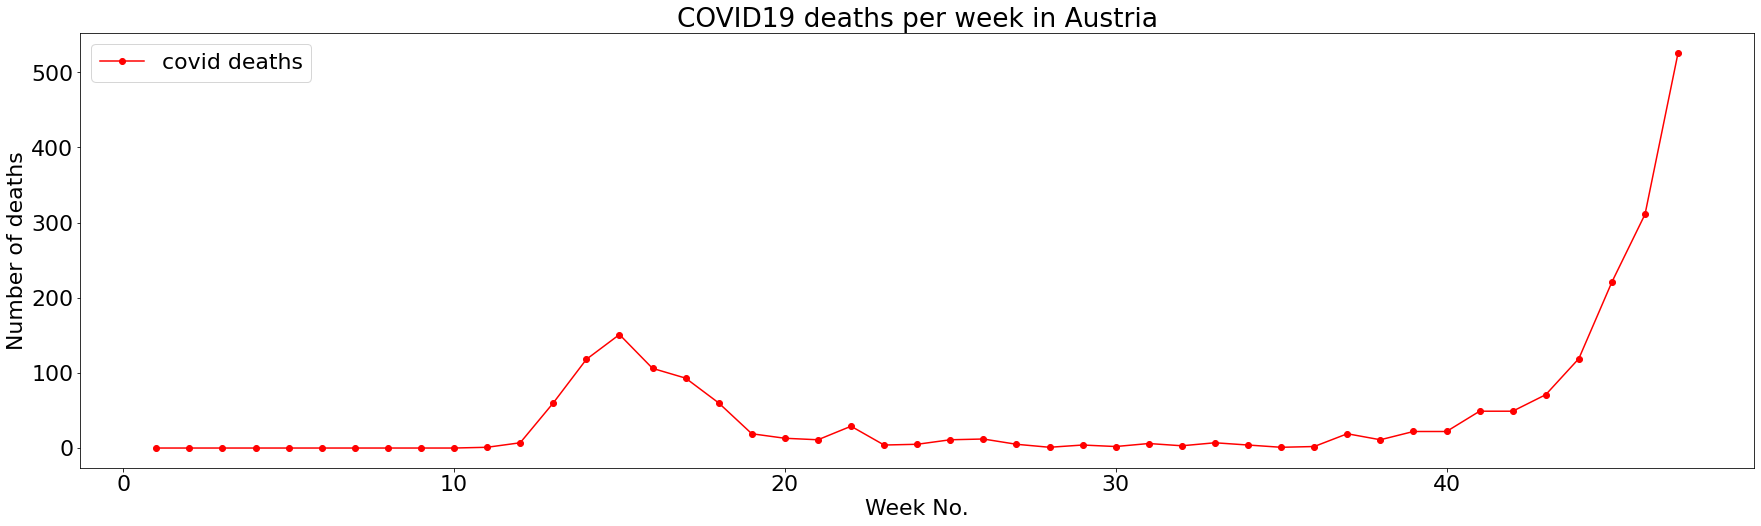

In [6]:
file_path = os.path.join('data', 'data_notebook-1_covid-2020.json')

df = pd.read_json(file_path) # reading json into dataframe
df = pd.json_normalize(df['records']) # taking records

austria = df.loc[(df['countriesAndTerritories'] == 'Austria') & (df['year'] == '2020')].copy() # filtering for Austria and taking only 2020 year (year column is string apperently)

austria['dateRep'] = pd.to_datetime(austria['dateRep'], dayfirst=True) # converting dateRep to datetime column
deaths = austria.groupby(austria['dateRep'].dt.isocalendar().week)['deaths'].sum() # grouping by week
deaths = deaths[:47] # since our first dataset contains data for only first 45 weeks we will stick to analysing only these weeks

# plotting
plt.figure(figsize=(30,8)) # making figure bigger
plt.rcParams.update({'font.size': 22}) # making font bigger
plt.plot(deaths, 'ro-', label='covid deaths') 
plt.title('COVID19 deaths per week in Austria')
plt.xlabel('Week No.')
plt.ylabel('Number of deaths')
plt.legend()

plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects:

* What is the task on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

Our second dataset shows the worldwide COVID19 cases in a huge dataframe. Because of the huge number of rows, we only focused on the cases from Austria and extracted these rows. 

The task on the data source supported by our visualisations, is to show the amount of deaths per week in Austia in 2020. Choosing a lineplot helps us to highlight the weekly differences beetween the absolut numbers. Our lineplot visualization shows what our task described, so the amount of deaths due to COVID19 in Austria per week until the 45th week, because in this dataset, this was the most recent data we could get (End November). 

It is pretty obvious that there was a high peak of deaths in the end March and the beginning of April. Furthermore we can see that the deaths started to increase in the last couple of weeks again, which can be attributed to the second outbreak. 

While plot helps to get data-driven perspective of the situation of the COVID19 crises, one must be careful about "COVID19 deaths" as the defining a death caused by COVID is a very difficult task and the definitions vary across countries. As we above focus on Austria, we can still assume that the plot has the described validity and helps answering our project question focused on the  development of COVID19 deaths in comparison to mortality. 

-----
## Step 3  (6 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

TAIL OF MERGED DATASET
         COVID_DEATHS  ALL_DEATHS
WEEK_NO                          
43                 71        3546
44                119        3778
45                221        4002
46                311        4572
47                526        4862


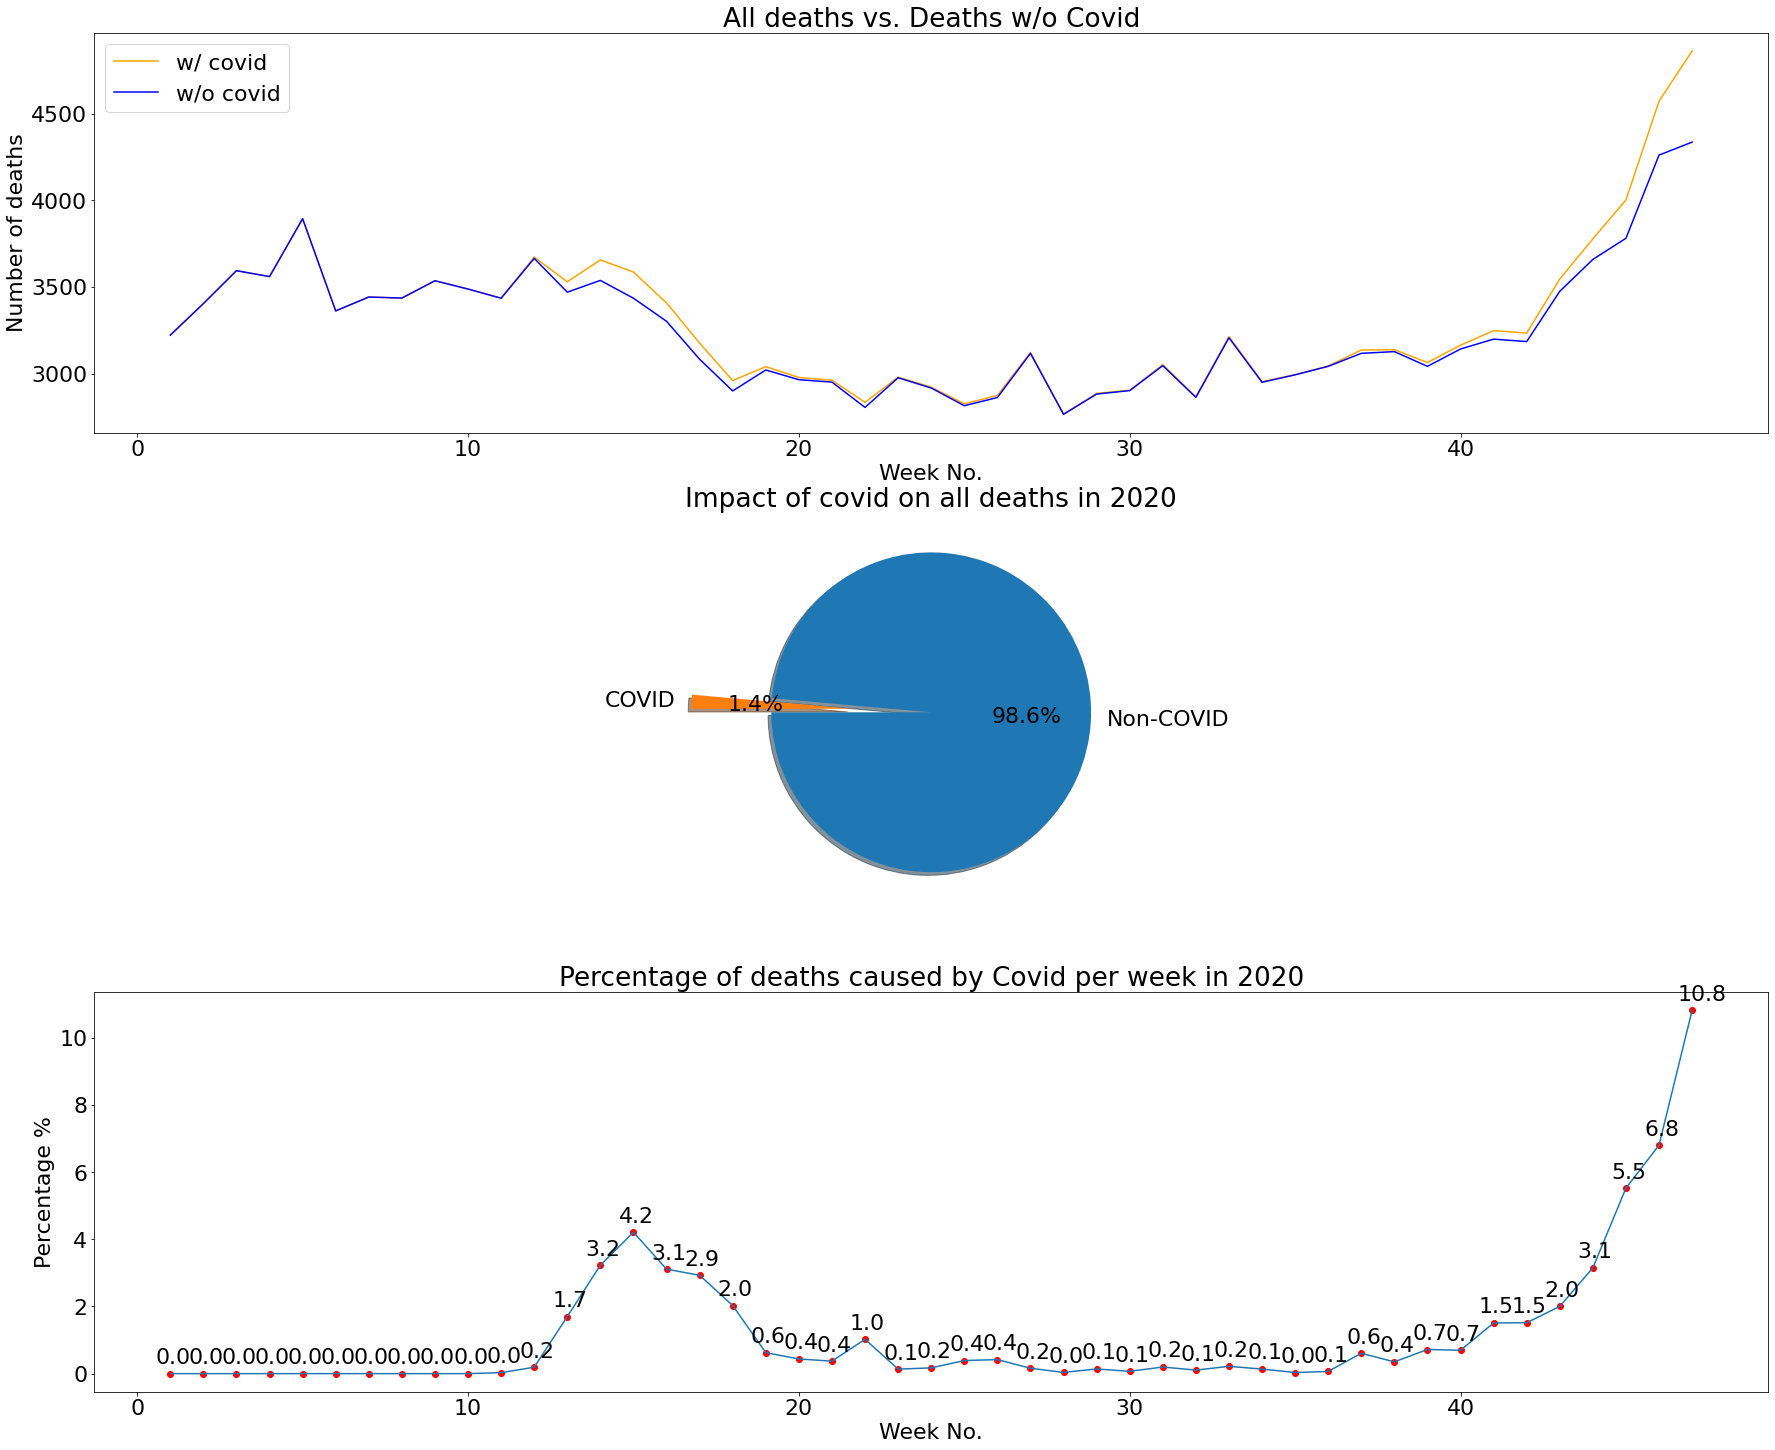

In [7]:
# MERGING DATA THAT IS ONLY RELEVANT FOR OUR PROJECT

merged = pd.merge(grouped_2020, deaths, left_index=True, right_index=True) # merging on week_no
merged['WEEK_NO'] = merged.index
merged.rename(columns={'deaths': 'COVID_DEATHS'}, inplace=True)
merged = merged[['COVID_DEATHS', 'ALL_DEATHS']]
merged = merged.astype({'ALL_DEATHS': int}) # changing deaths from floats to integers (for some reason it got read by pandas as floats) 
print('TAIL OF MERGED DATASET')
print(merged.tail())


# for the sake of keeping it simple we will just use variables that are already assigned in previous steps
fig, plot = plt.subplots(3,1, figsize=(30,25))
plot[0].plot(grouped_2020, color='orange', label='w/ covid')
deaths_wo_vid = grouped_2020.subtract(deaths) # deaths without covid
plot[0].plot(deaths_wo_vid, color='b', label='w/o covid')
plot[0].set_title('All deaths vs. Deaths w/o Covid')
plot[0].set_xlabel('Week No.')
plot[0].set_ylabel('Number of deaths')
plot[0].legend()

# impact of covid overall in 2020 (PIECHART)
x = deaths_wo_vid.sum() # sum of deahs without covid
y = deaths.sum() # sum of all deaths
perc = y / x * 100 # percentage of covid deaths
labels = ['Non-COVID', 'COVID']
plot[1].set_title('Impact of covid on all deaths in 2020')
plot[1].pie([100 - perc, perc], labels=labels, explode=(0,0.5),autopct='%1.1f%%', shadow=True, startangle=180)


# Percentage of deaths caused by Covid per week
percentage = 100 - deaths_wo_vid.div(grouped_2020, fill_value=np.NaN).mul(100)
plot[2].scatter(percentage.index, percentage, color='r')
plot[2].plot(percentage)
plot[2].set_title('Percentage of deaths caused by Covid per week in 2020')
for label, week, perc in zip(percentage, percentage.index, percentage):
    plot[2].annotate(round(label,1),
                 xy=(week, perc), # put the label with its point
                 xytext=(-15, 10), # but slightly offset
                 textcoords='offset points')
plot[2].set_xlabel('Week No.')
plot[2].set_ylabel('Percentage %')
    
fig.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects:

* What is the task on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

The main project idea from the start was is to give a more objective perspective on the impact of the Pandemic on mortality in Austria. News sources and media, while informing the public, may also spread drastic messages that are can not be evaluated properly without taking data into account. Therefore we plan to look at the mortality rates of Austria from 2007-2020 from the first data set and look at the Corona Cases since beginning of 2020 in the second dataset, with the goal of inspecting if we can identify changes, patterns or spikes in the mortality rates that correspond to increased coronavirus cases. 

Now we put our project idea into action. We chose to combine our two datasets which results in combining the weekly deaths in general with the COVID19 deaths in Austria in the form of multiple plots. We are interested in observing the relation between the two numbers and the proportion COVID19 deaths take from overall deaths per week in Austria. 

First we use a line plot, which visualizes how many of the deaths occured in general ("normal" deaths + COVID deaths = orange line) and how many deaths occured if we substract the COVID deaths from the overall deaths = blue line. We can see that only in March, April and September there was a significantly higher amount of deaths due to COVID19. In all other weeks the COVID19 cases only take a very small percentage of overall deaths, which is represented by the narrow distance between the orange and blue line. 

To get a better understanding of the magnitude of COVID deaths in comparison to overall deaths, we added first a pie chart and then another line plot. The pie chart shows 1.8% of the deaths in 2020 happend due to COVID19 (based on the definition in Austria). This might not seem like much, but to get a more detailed look on the data we also choose to visualise the percentage of deaths caused by COVID19 per week in 2020.

The percentage has a peek of 11.1% in November. That means 11.1% of all people who died in that week died because of (or with) the COVID19 virus. We can also clearly compare the growth rates between the first peak and now, which underlines the severeness of growing COVID19 cases inspected from our data.

To show the connection between our graphs, the 1.8% in the pie chart above is the average from these percentages.

Generally it was super interesting to combine the two datasets and have a realistic picture about how many people exactly died because of COVID19 and what are typical moratlity rates in Austria. Nowadays the newspaper always show drastic numbers but often forget to put it in the context.

-----
## Step 4  (2 points)

Persist the merged dataset from Step 3 as a file.

In [8]:
outfile = os.path.join('data', 'data_notebook-1_AUSTRIA_all-deaths_vs_covid-deaths_2020(step4).csv')
merged.to_csv(outfile, sep=',', index=True) # saving the dataframe to csv file